In [6]:
import pandas as pd

df = pd.read_parquet('../data/parquet/dataset_size_info.parquet')

# drop null and clean dataframe
df = df.dropna()
df = df[df['dsize'] > 0.]
df = df[df['nfiles'] > 0]
df = df[df['devts'] > 0]

for word in ['BUNNIES', 'Commissioning', 'RelVal']:
    df = df[~df['d_dataset'].str.contains(word)]

df.head(None)


,d_dataset,dsize,nfiles,devts,tier
0,/w1j_300ptw800_alpgen-alpgen/CMSSW_1_6_7-CSA07...,1.712772e+11,57,56662,RECO
1,/rs1gg_1250GeV_c001/CMSSW_1_6_0-CSA07-2799/GEN...,3.885736e+10,21,20412,GEN-SIM-DIGI-RAW
2,/mcatnloWWte/CMSSW_1_4_6-CSA07-2368/GEN-SIM,6.098052e+09,7,17274,GEN-SIM
3,/comphep-bbll/CMSSW_1_4_5-CSA07-1185019773/GEN,1.783459e+12,680,68000000,GEN
4,/bprimecWtW_225GeV/CMSSW_1_6_7-CSA07-3757/GEN-...,4.957051e+10,21,20300,GEN-SIM-DIGI-RAW
...,...,...,...,...,...
1271116,/ZeroBias12/Tier0_REPLAY_2021-PromptReco-v2110...,2.214283e+09,1,961835,AOD
1271117,/ZPrimeToTT_M1200_W360_TuneCP2_13TeV-madgraph-...,3.257134e+10,19,473000,MINIAODSIM
1271118,/HToZATo2L2B_MH-800p00_MA-700p00_tb-20p00_Tune...,1.417517e+10,4,30000,AODSIM
1271119,/ZDfD_ZDtofD1decay_MZD91p1876_MfD15_MfD22_Tune...,1.651916e+07,1,12000,NANOAODSIM


In [7]:
from cmSim import utils

df = df[df['tier'].isin(utils.get_datatiers(type='data'))]

datatiers = ['RAW', 'RECO', 'AOD', 'ALCARECO', 'RAW-RECO',
            'FEVT', 'USER', 'PREMIX', 'MINIAOD', 'NANOAOD']
df['tier'] = df['tier'].apply(
    lambda dtier: dtier if dtier in datatiers else 'Other')

datatier_to_totsize = {tier: dframe['dsize'].sum()
                       for tier, dframe in df.groupby('tier')}


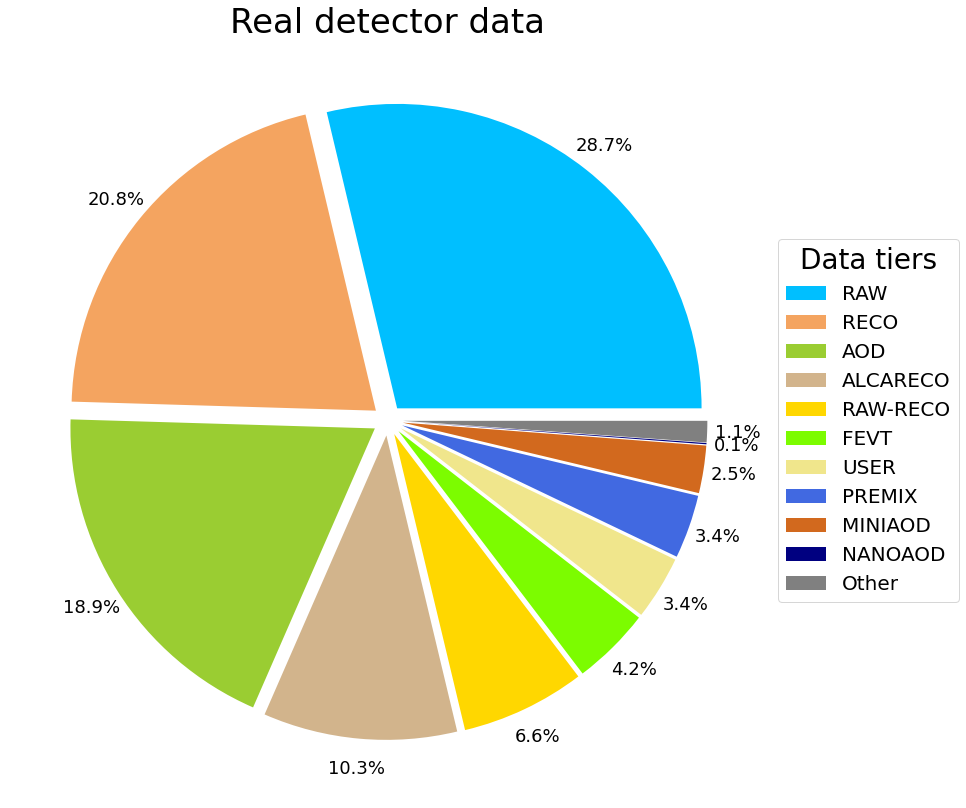

In [8]:
import pylab as plt
from cmSim.tools import plotting

# get sorted datatiers
datatiers = sorted(datatier_to_totsize,
                   key=datatier_to_totsize.get, reverse=True)
if 'Other' in datatiers:
    datatiers.remove('Other')
    datatiers = datatiers + ['Other']

# get pie slices and colors
sizes = [datatier_to_totsize[tier] for tier in datatiers]
colors = plotting.get_custom_colors(datatiers, groups='datatiers')

fig, ax = plt.subplots(figsize=(14, 14))
ax.pie(sizes, labels=datatiers, colors=colors, explode=[0.05]*len(sizes), normalize=True,
       autopct='%1.1f%%', pctdistance=1.1, textprops={'fontsize': 18}, labeldistance=None)
totsize = round(df['dsize'].sum() / 1e15)
ax.set_title(f'Real detector data', fontsize=34)
ax.legend(title='Data tiers', title_fontsize=28, loc='center left',
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=20)
fig.set_facecolor('white')

plt.show()
